In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import multiprocessing
multiprocessing.cpu_count()

12

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
train = pd.read_csv('../Details/dataset/train.csv', index_col=False)
test = pd.read_csv('../Details/dataset/test.csv', index_col=False)

In [6]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,A,I,A,B,B,BI,A,S,Q,A,LO,A,A,A,A,B,D,D,B,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,A,I,A,A,E,BI,K,W,AD,F,HJ,A,B,A,B,D,B,D,B,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,A,K,A,A,E,BI,A,E,BM,L,DJ,A,B,A,A,B,D,D,B,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,A,K,A,C,E,BI,A,Y,AD,F,KV,A,A,A,A,B,D,D,B,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,A,I,G,B,E,BI,C,G,Q,A,DP,A,A,A,B,B,B,D,B,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      300000 non-null  int64  
 1   cat0    300000 non-null  object 
 2   cat1    300000 non-null  object 
 3   cat2    300000 non-null  object 
 4   cat3    300000 non-null  object 
 5   cat4    300000 non-null  object 
 6   cat5    300000 non-null  object 
 7   cat6    300000 non-null  object 
 8   cat7    300000 non-null  object 
 9   cat8    300000 non-null  object 
 10  cat9    300000 non-null  object 
 11  cat10   300000 non-null  object 
 12  cat11   300000 non-null  object 
 13  cat12   300000 non-null  object 
 14  cat13   300000 non-null  object 
 15  cat14   300000 non-null  object 
 16  cat15   300000 non-null  object 
 17  cat16   300000 non-null  object 
 18  cat17   300000 non-null  object 
 19  cat18   300000 non-null  object 
 20  cont0   300000 non-null  float64
 21  cont1   30

In [8]:
train.describe()

,id,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,250183.425697,0.504749,0.494073,0.516632,0.474235,0.504848,0.502257,0.488229,0.501739,0.488074,0.469496,0.508230,0.264870
std,144320.334812,0.206788,0.213037,0.214851,0.216636,0.227474,0.241243,0.211335,0.203496,0.179048,0.194516,0.203393,0.441265
min,0.000000,-0.049562,0.084480,0.094493,-0.045316,0.168071,-0.036379,0.005199,0.090901,0.024139,0.214866,0.097789,0.000000
25%,125399.750000,0.344985,0.317363,0.326047,0.292249,0.279303,0.276442,0.323914,0.353054,0.358915,0.309934,0.368312,0.000000
50%,250192.500000,0.479650,0.463170,0.471247,0.387564,0.479858,0.554768,0.518089,0.435404,0.410908,0.407477,0.446576,0.000000
75%,375246.250000,0.637657,0.693992,0.704625,0.644950,0.725779,0.735225,0.608537,0.642023,0.612725,0.586793,0.581957,1.000000
max,499999.000000,1.004559,1.009958,1.016600,0.952187,0.858578,0.853022,0.966553,1.035818,1.055885,1.005652,1.011331,1.000000


In [9]:
obj_col = [i for i in train.columns if train[i].dtype=="O"]
num_col = [i for i in train.columns if train[i].dtype!="O"]
len(obj_col), len(num_col)

(19, 13)

In [10]:
num_col.remove('id')
num1 = num_col[0: (len(num_col)//2)]
num1.append('target')
num2 = num_col[len(num_col)//2:len(num_col)]
print(num1, num2)

['cont0', 'cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'target'] ['cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'target']


In [11]:
sns.pairplot(train[num1], hue='target')

In [ ]:
sns.pairplot(train[num1])

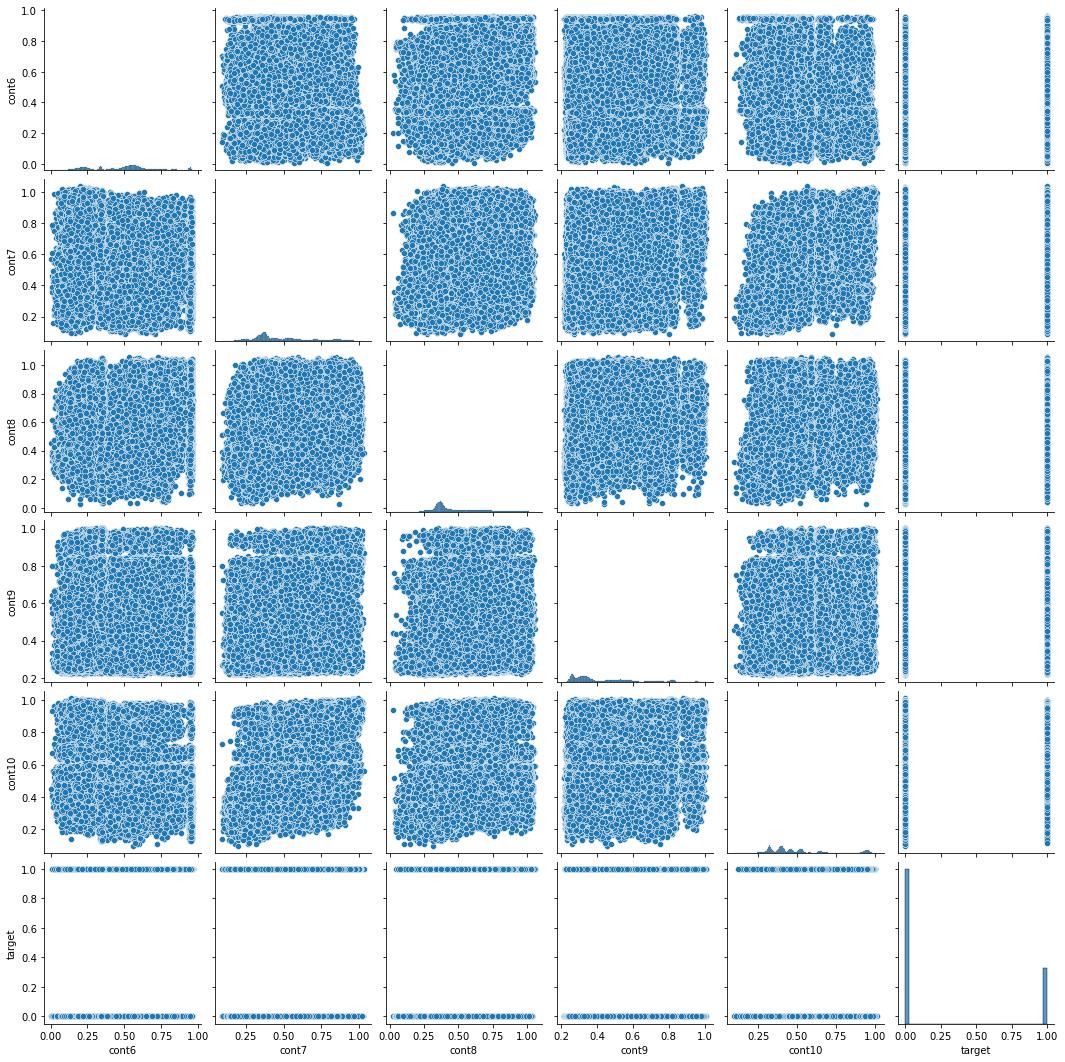

In [12]:
sns.pairplot(train[num2])

In [13]:
for i in obj_col:
    print("{} -- {}".format(i, train[i].nunique()))

cat0 -- 2
cat1 -- 15
cat2 -- 19
cat3 -- 13
cat4 -- 20
cat5 -- 84
cat6 -- 16
cat7 -- 51
cat8 -- 61
cat9 -- 19
cat10 -- 299
cat11 -- 2
cat12 -- 2
cat13 -- 2
cat14 -- 2
cat15 -- 4
cat16 -- 4
cat17 -- 4
cat18 -- 4


In [16]:
train['target'].value_counts(1)

0    0.73513
1    0.26487
Name: target, dtype: float64

In [20]:
for i in [0,11,12,13,14,15,16,17,18]:
    print('cat'+str(i))
    print(train['cat'+str(i)].value_counts(1))

cat0
A    0.745083
B    0.254917
Name: cat0, dtype: float64
cat11
A    0.863107
B    0.136893
Name: cat11, dtype: float64
cat12
A    0.85713
B    0.14287
Name: cat12, dtype: float64
cat13
A    0.975707
B    0.024293
Name: cat13, dtype: float64
cat14
A    0.533887
B    0.466113
Name: cat14, dtype: float64
cat15
B    0.678580
D    0.277293
A    0.036907
C    0.007220
Name: cat15, dtype: float64
cat16
D    0.689687
B    0.281803
C    0.017897
A    0.010613
Name: cat16, dtype: float64
cat17
D    0.823750
B    0.087120
C    0.084417
A    0.004713
Name: cat17, dtype: float64
cat18
B    0.851607
D    0.074647
C    0.071380
A    0.002367
Name: cat18, dtype: float64


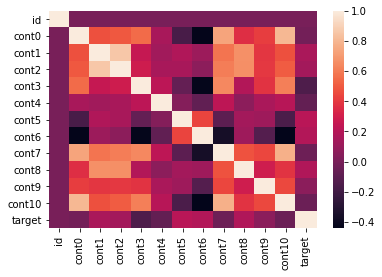

In [22]:
sns.heatmap(train.corr())
plt.show()

In [28]:
for i in obj_col:
    print("{}\n{} -- {}".format(i, train[i].unique(), train[i].nunique()))

cat0
['A' 'B'] -- 2
cat1
['I' 'K' 'A' 'F' 'L' 'N' 'J' 'M' 'O' 'B' 'H' 'G' 'C' 'D' 'E'] -- 15
cat2
['A' 'G' 'C' 'O' 'D' 'F' 'Q' 'J' 'L' 'I' 'M' 'H' 'U' 'N' 'R' 'E' 'K' 'S'
 'B'] -- 19
cat3
['B' 'A' 'C' 'D' 'G' 'N' 'H' 'F' 'E' 'K' 'I' 'J' 'L'] -- 13
cat4
['B' 'E' 'H' 'I' 'D' 'F' 'G' 'M' 'K' 'J' 'T' 'C' 'L' 'P' 'S' 'O' 'N' 'Q'
 'A' 'R'] -- 20
cat5
['BI' 'AB' 'BU' 'M' 'T' 'K' 'L' 'CG' 'BG' 'CI' 'N' 'G' 'X' 'Q' 'O' 'BO'
 'BB' 'BX' 'AF' 'BA' 'BQ' 'CA' 'D' 'AQ' 'AS' 'AW' 'BE' 'CK' 'AL' 'BK' 'AT'
 'CL' 'C' 'CF' 'I' 'AH' 'CD' 'AY' 'BY' 'F' 'AI' 'R' 'BC' 'BH' 'AA' 'V'
 'CE' 'BD' 'AE' 'U' 'AU' 'AP' 'CJ' 'AN' 'AX' 'AR' 'BL' 'J' 'ZZ' 'BR' 'BV'
 'H' 'A' 'CC' 'P' 'CH' 'BJ' 'CB' 'BS' 'BN' 'AO' 'AJ' 'BT' 'S' 'E' 'Y' 'AK'
 'AM' 'B' 'BM' 'AV' 'AG' 'BF' 'BP'] -- 84
cat6
['A' 'K' 'C' 'I' 'G' 'E' 'M' 'F' 'O' 'D' 'Q' 'S' 'B' 'Y' 'U' 'W'] -- 16
cat7
['S' 'W' 'E' 'Y' 'G' 'AV' 'AF' 'AK' 'AH' 'AN' 'J' 'H' 'U' 'AG' 'AS' 'AA'
 'B' 'F' 'AI' 'K' 'AD' 'D' 'N' 'I' 'AW' 'AY' 'AX' 'L' 'AL' 'C' 'R' 'P'
 'AU' 'O' 'AR' 'AO

In [12]:
label_encoding_var = ['cat0','cat1','cat2','cat3','cat4','cat11','cat12','cat13','cat14','cat15','cat16','cat17','cat18']
freq_encoding_var = ['cat5', 'cat6', 'cat8', 'cat7', 'cat9','cat10']

In [54]:
num_col.remove('target')

<AxesSubplot:>

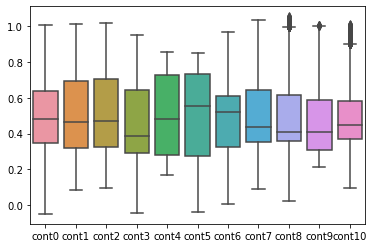

In [58]:
sns.boxplot(data=train[num_col], orient="y")

<AxesSubplot:>

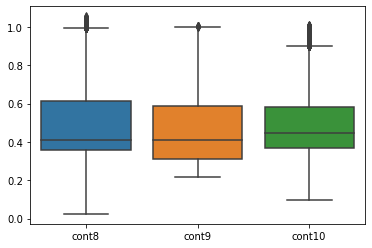

In [59]:
sns.boxplot(data=train[num_col[-3:]], orient="y")

In [83]:
print(train[train.cont8 > np.percentile(train['cont8'], 95)]['cont8'].describe())
print(train[train.cont8 > np.percentile(train['cont8'], 75)]['cont8'].describe())

count    15000.000000
mean         0.932824
std          0.054163
min          0.833643
25%          0.883570
50%          0.944465
75%          0.977311
max          1.055885
Name: cont8, dtype: float64
count    75000.000000
mean         0.752047
std          0.106301
min          0.612725
25%          0.673572
50%          0.720501
75%          0.804062
max          1.055885
Name: cont8, dtype: float64


In [74]:
print(train[train.cont9 > np.percentile(train['cont9'], 95)]['cont9'].describe())
print(train[train.cont9 > np.percentile(train['cont9'], 75)]['cont9'].describe())

count    15000.000000
mean         0.915154
std          0.052309
min          0.829933
25%          0.870363
50%          0.934853
75%          0.958691
max          1.005652
Name: cont9, dtype: float64
count    75000.000000
mean         0.754935
std          0.107065
min          0.586793
25%          0.674351
50%          0.743869
75%          0.821575
max          1.005652
Name: cont9, dtype: float64


In [75]:
print(train[train.cont10 > np.percentile(train['cont10'], 95)]['cont10'].describe())
print(train[train.cont10 > np.percentile(train['cont10'], 75)]['cont10'].describe())

count    15000.000000
mean         0.964141
std          0.010676
min          0.950123
25%          0.955581
50%          0.961882
75%          0.970456
max          1.011331
Name: cont10, dtype: float64
count    75000.000000
mean         0.814644
std          0.140196
min          0.581959
25%          0.661007
50%          0.875485
75%          0.944892
max          1.011331
Name: cont10, dtype: float64


<AxesSubplot:xlabel='cont8', ylabel='Count'>

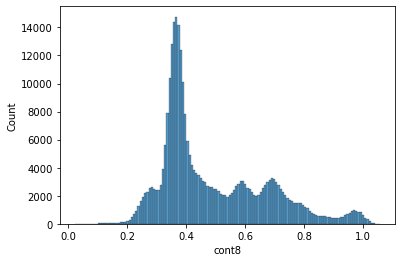

In [89]:
sns.histplot(train['cont8'])

<AxesSubplot:xlabel='cont9', ylabel='Count'>

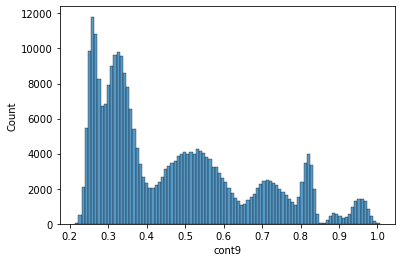

In [90]:
sns.histplot(train['cont9'])

<AxesSubplot:xlabel='cont10', ylabel='Count'>

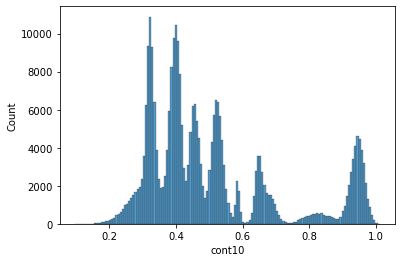

In [91]:
sns.histplot(train['cont10'])

In [31]:
for i in obj_col:
    print("{} -- {}".format(i, test[i].nunique()))

cat0 -- 2
cat1 -- 15
cat2 -- 19
cat3 -- 13
cat4 -- 20
cat5 -- 84
cat6 -- 16
cat7 -- 51
cat8 -- 61
cat9 -- 19
cat10 -- 295
cat11 -- 2
cat12 -- 2
cat13 -- 2
cat14 -- 2
cat15 -- 4
cat16 -- 4
cat17 -- 4
cat18 -- 4


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_auc_score

In [14]:
le = LabelEncoder()

for i in label_encoding_var:
    train[i] = le.fit_transform(train[i].values)

In [15]:
for i in freq_encoding_var:
    enc = (train.groupby(i).size())/len(train)
    train[i] = train[i].apply(lambda x : enc[x])

In [16]:
train.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,target
0,0,0,8,0,1,1,0.79521,0.626320,0.026403,0.013763,0.673150,0.010513,0,0,0,0,1,3,3,1,0.629858,0.855349,0.759439,0.795549,0.681917,0.621672,0.592184,0.791921,0.815254,0.965006,0.665915,0
1,1,0,8,0,0,4,0.79521,0.005173,0.005083,0.048877,0.047903,0.009447,0,1,0,1,3,1,3,1,0.370727,0.328929,0.386385,0.541366,0.388982,0.357778,0.600044,0.408701,0.399353,0.927406,0.493729,0
2,2,0,10,0,0,4,0.79521,0.626320,0.132003,0.141267,0.009857,0.105280,0,1,0,0,1,3,3,1,0.502272,0.322749,0.343255,0.616352,0.793687,0.552877,0.352113,0.388835,0.412303,0.292696,0.549452,0
3,3,0,10,0,2,4,0.79521,0.626320,0.019653,0.048877,0.047903,0.001910,0,0,0,0,1,3,3,1,0.934242,0.707663,0.831147,0.807807,0.800032,0.619147,0.221789,0.897617,0.633669,0.760318,0.934242,0
4,4,0,8,6,1,4,0.79521,0.238090,0.018853,0.013763,0.673150,0.078930,0,0,0,1,1,1,3,1,0.254427,0.274514,0.338818,0.277308,0.610578,0.128291,0.578764,0.279167,0.351103,0.357084,0.328960,1


In [17]:
x_train, x_test, y_train, y_test = train_test_split(train.drop(['id', 'target'], axis=1), train['target'], random_state=42)

In [18]:
y_train.value_counts(1)

0    0.733973
1    0.266027
Name: target, dtype: float64

In [19]:
y_test.value_counts(1)

0    0.7386
1    0.2614
Name: target, dtype: float64

In [20]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [21]:
train_pred = rf.predict_proba(x_train)
roc_auc_score(y_train, train_pred[:,1])

0.9999999997976703

In [23]:
le = LabelEncoder()

for i in label_encoding_var:
    test[i] = le.fit_transform(test[i].values)

In [24]:
for i in freq_encoding_var:
    enc = (test.groupby(i).size())/len(test)
    test[i] = test[i].apply(lambda x : enc[x])

In [25]:
test.head()

,id,cat0,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cont0,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10
0,5,0,5,0,0,5,0.79458,0.625490,0.152965,0.073265,0.671115,0.021355,0,0,0,0,1,3,3,1,0.708120,0.735690,0.578366,0.723154,0.228037,0.356227,0.551249,0.655693,0.598331,0.359987,0.947489
1,6,0,7,2,0,4,0.13984,0.022465,0.018420,0.025190,0.671115,0.004390,0,0,0,1,3,1,3,1,0.611637,0.313703,0.928885,0.516602,0.600169,0.795224,0.248987,0.654614,0.347944,0.565520,0.388580
2,8,0,13,2,0,5,0.13984,0.625490,0.152965,0.019060,0.671115,0.002300,0,0,0,1,1,3,3,1,0.456289,0.448201,0.424876,0.344729,0.242073,0.270632,0.746740,0.335590,0.341238,0.252289,0.411592
3,9,1,11,2,0,5,0.79458,0.625490,0.131200,0.073265,0.671115,0.102795,0,0,0,0,1,3,1,1,0.338692,0.666092,0.598943,0.561971,0.806347,0.735983,0.538724,0.381566,0.481660,0.348514,0.325723
4,11,0,5,0,1,5,0.79458,0.625490,0.152965,0.023115,0.671115,0.043430,0,0,0,0,3,3,3,1,0.631671,0.772229,0.479572,0.767745,0.252454,0.354810,0.178920,0.763479,0.562491,0.466261,0.585781


In [26]:
idx = test['id']

In [27]:
test_pred = rf.predict_proba(test.drop(['id'], axis=1))

In [35]:
df = pd.DataFrame(columns=['id', 'target'])
df['id'] = idx.values
df['target'] = test_pred[:,1]
df.head()

,id,target
0,5,0.18
1,6,0.56
2,8,0.03
3,9,0.11
4,11,0.13


In [37]:
df.to_csv('submission.csv', index=False)

In [25]:
# from lightgbm import LGBMClassifier
# lgb = LGBMClassifier()
# lgb.fit(x_train, y_train)